Build the following dataset.

Apply all the preprocessing steps

* Handle missing Price data by replacing Mean of Price
* Handle missing  Quantity by replacing with 0
* Handle missing aftnoon and forenoon by replacing Mode of afternoon and forenoon respectively
* Handle missing bought by relacing the mean of exact same item.
* Replace Categorical values into numeric values


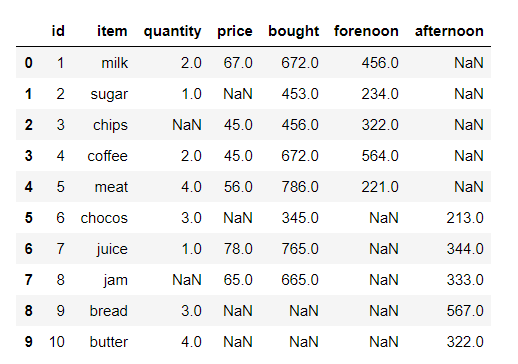

In [ ]:
#Solve Here

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer

data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'item': ['milk', 'sugar', 'chips', 'coffee', 'meat', 'chocos', 'juice', 'jam', 'bread', 'butter'],
    'quantity': [2.0, 1.0, None, 2.0, 4.0, 3.0, 1.0, None, 3.0, 4.0],
    'price': [67.0, None, 45.0, 45.0, 56.0, None, 78.0, 65.0, None, None],
    'budget': [672.0, 453.0, 456.0, 672.0, 786.0, 345.0, 756.0, 665.0, None, None],
    'forenoon': [456.0, 234.0, 322.0, 564.0, 221.0, None, None, None, None, None],
    'afternoon': [None, None, None, None, None, 213.0, 344.0, 333.0, 567.0, 322.0]
}


In [18]:
df = pd.DataFrame(data)

In [19]:
df

,id,item,quantity,price,budget,forenoon,afternoon
0,1,milk,2.0,67.0,672.0,456.0,NaN
1,2,sugar,1.0,NaN,453.0,234.0,NaN
2,3,chips,NaN,45.0,456.0,322.0,NaN
3,4,coffee,2.0,45.0,672.0,564.0,NaN
4,5,meat,4.0,56.0,786.0,221.0,NaN
5,6,chocos,3.0,NaN,345.0,NaN,213.0
6,7,juice,1.0,78.0,756.0,NaN,344.0
7,8,jam,NaN,65.0,665.0,NaN,333.0
8,9,bread,3.0,NaN,NaN,NaN,567.0
9,10,butter,4.0,NaN,NaN,NaN,322.0


In [20]:
price_imputer = SimpleImputer(strategy='mean')
df['price'] = price_imputer.fit_transform(df[['price']])

In [21]:
df['quantity'].fillna(0, inplace=True)

In [22]:
forenoon_mode = df['forenoon'].mode()[0]
afternoon_mode = df['afternoon'].mode()[0]
df['forenoon'].fillna(forenoon_mode, inplace=True)
df['afternoon'].fillna(afternoon_mode, inplace=True)

In [23]:
df['budget'] = df.groupby('item')['budget'].transform(lambda x: x.fillna(x.mean()))

In [28]:
mode_bought = df['bought'].mode()[0]
df['bought'].fillna(mode_bought, inplace=True)

In [29]:
item_mapping = {item: i+1 for i, item in enumerate(df['item'].unique())}
df['item'] = df['item'].map(item_mapping)

In [30]:
print(df)

   id  item  quantity      price  bought  forenoon  afternoon
0   1     1       2.0  67.000000   672.0       456        213
1   2     2       1.0  59.333333   453.0       234        213
2   3     3       0.0  45.000000   456.0       322        213
3   4     4       2.0  45.000000   672.0       564        213
4   5     5       4.0  56.000000   786.0       221        213
5   6     6       3.0  59.333333   345.0       221        213
6   7     7       1.0  78.000000   765.0       221        344
7   8     8       0.0  65.000000   665.0       221        333
8   9     9       3.0  59.333333   672.0       221        567
9  10    10       4.0  59.333333   672.0       221        322


   id    item  quantity      price  bought  forenoon  afternoon
0   1    milk       2.0  67.000000   672.0       456        213
1   2   sugar       1.0  59.333333   453.0       234        213
2   3   chips       0.0  45.000000   456.0       322        213
3   4  coffee       2.0  45.000000   672.0       564        213
4   5    meat       4.0  56.000000   786.0       221        213
5   6  chocos       3.0  59.333333   345.0       221        213
6   7   juice       1.0  78.000000   765.0       221        344
7   8     jam       0.0  65.000000   665.0       221        333
8   9   bread       3.0  59.333333   672.0       221        567
9  10  butter       4.0  59.333333   672.0       221        322
